In [ ]:
pip install qiskit

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.sustech.edu.cn/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.sustech.edu.cn/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 198.6 kB/s eta 0:00:001m184.4 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136836 sha256=d718b9a467caf82a5d782a7f5ac2758ef7fcc7d4dc110845f6ff458035fd8528
  Stored in directory: /home/narges/.cache/pip/wheels/c3/2f/72/65d9f8bab7c00f616d11fc31c020fdde3bb5eccbe75c11c620
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn==1.1.3

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.sustech.edu.cn/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 667.2 kB/s eta 0:00:00m eta 0:00:010:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-aqua 0.9.0 requires scikit-learn<=0.24.1,>=0.20.0, but you have scikit-learn 1.1.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import pylatexenc
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import sympy



%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#imports datasets from scikit-learn
from sklearn import datasets
#loads Boston dataset from datasets library
from sklearn.datasets import load_boston
from sklearn import metrics


In [ ]:

def inner_prod_norm_output(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')
    N = len(vec1)
    nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y

    xnorm = np.linalg.norm(vec1)           #sqrt(0^2+1^2+3^2+4^2+5^2+6^2+7^2)        # normalise vectors x and y
    ynorm = np.linalg.norm(vec2)
    vec1 = vec1/xnorm
    vec2= vec2/ynorm
    circ = QuantumCircuit(2*nqubits+1,1)
    circ.h(0)   # create circuit
    circ.initialize(vec1,qubits=range(1,nqubits+1))
    circ.initialize(vec2,range(nqubits+1,2*nqubits+1))
    for i in range(1,nqubits+1):
      circ.cswap(control_qubit=0,target_qubit1=i,target_qubit2=nqubits+i)
    circ.h(0)
    circ.measure(qubit=0,cbit=0)
    shut_number=1000
    job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

    count = job.result().get_counts(circ)
    dot=np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number

    return dot

def anzats_7parameter_power2(x,parameters):
    y=parameters[0]*x[0]**2+parameters[1]*2*x[0]*x[1]+parameters[2]*2*x[0]*x[2]+parameters[3]*2*x[0]*x[3]
    +parameters[4]*2*x[0]*x[4]+parameters[5]*2*x[0]*x[5]+parameters[6]*2*x[0]*x[6]+parameters[7]*x[1]**2+parameters[8]*2*x[1]*x[2]
    +parameters[9]*2*x[1]*x[3]+parameters[10]*2*x[1]*x[4]+parameters[11]*2*x[1]*x[5]+parameters[12]*2*x[1]*x[6]
    +parameters[13]*x[2]**2+parameters[14]*2*x[2]*x[3]+parameters[15]*2*x[2]*x[4]+parameters[16]*2*x[2]*x[5]
    +parameters[17]*2*x[2]*x[6]+parameters[18]*x[3]**2+parameters[19]*2*x[3]*x[4]+parameters[20]*2*x[3]*x[5]
    +parameters[21]*2*x[3]*x[6]+parameters[22]*x[4]**2+parameters[23]*2*x[4]*x[5]+parameters[24]*2*x[4]*x[6]
    +parameters[25]*x[5]**2+parameters[26]*2*x[5]*x[6]+parameters[27]*x[6]**2
    return y



def anzats_5parameter_power1(x,parameters):
    y=parameters[0]*x[0]+parameters[1]*x[1]+parameters[2]*x[2]+parameters[3]*x[3]+parameters[4]*x[4]
    return y


def calculate_cost_function_7parameter_power2(parameters,x_all,y_all_truth):
    y_list=[]
    for x in x_all:

      y=anzats_7parameter_power2(x,parameters)


      y_list.append(y)


    y_Norm = np.linalg.norm(y_list)
    y_truth_norm  =np.linalg.norm(y_all_truth)   # normalise ansatz

    y_list = y_list/y_Norm
    y_all_truth=y_all_truth/ y_truth_norm

    y_ansatz = y_Norm /y_truth_norm  * inner_prod_norm_output(y_list, y_all_truth)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors
    return (1-y_ansatz)**2


def calculate_cost_function_5parameter_power1(parameters,x_all,y_all_truth):
    y_list=[]
    for x in x_all:

      y=anzats_5parameter_power1(x,parameters)


      y_list.append(y)


    y_Norm = np.linalg.norm(y_list)
    y_truth_norm  =np.linalg.norm(y_all_truth)   # normalise ansatz

    y_list = y_list/y_Norm
    y_all_truth=y_all_truth/ y_truth_norm

    y_ansatz = y_Norm /y_truth_norm  * inner_prod_norm_output(y_list, y_all_truth)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors
    return (1-y_ansatz)**2


def R_2_5parameter_power1(x_test,optimized_parameter,y_test):
  y_pred_list=[]
  for x,y in zip(x_test,y_test):
    y_pred=anzats_5parameter_power1(x,optimized_parameter)
    y_pred_list.append(y_pred)
  R2=metrics.r2_score(y_test, y_pred_list)
  return R2


In [ ]:
x1,x2,x3,x4,x5,x6,x7 = sympy.symbols("x1 x2 x3 x4 x5 x6 x7")
formula = ((x1+x2+x3+x4+x5+x6+x7) **2).expand()
formula,(7**2+7)/2

(x1**2 + 2*x1*x2 + 2*x1*x3 + 2*x1*x4 + 2*x1*x5 + 2*x1*x6 + 2*x1*x7 + x2**2 + 2*x2*x3 + 2*x2*x4 + 2*x2*x5 + 2*x2*x6 + 2*x2*x7 + x3**2 + 2*x3*x4 + 2*x3*x5 + 2*x3*x6 + 2*x3*x7 + x4**2 + 2*x4*x5 + 2*x4*x6 + 2*x4*x7 + x5**2 + 2*x5*x6 + 2*x5*x7 + x6**2 + 2*x6*x7 + x7**2,
 28.0)

In [ ]:
x_all=[[1,2,3,4,8,5,6],[4,9,7,2,4,5,6],[7,8,1,0,7,8,9],[8,4,6,7,5,1,7]]
y_all=[4,5,9,8]
parameters=[random.uniform(0,2) for p in range(28)] #28=(7,2)+7
calculate_cost_function_7parameter_power2(parameters,x_all,y_all)

1073.8487719575264

In [ ]:
out = minimize(calculate_cost_function_power2, x0=parameters,args=(x_all,y_all), method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function_power2, x0=parameters,args=(x_all,y_all), method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function_power2, x0=parameters, args=(x_all,y_all),method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function_power2, x0=parameters,args=(x_all,y_all), method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function_power2, x0=parameters,args=(x_all,y_all), method="trust-constr", options={'maxiter':200}, tol=1e-6)

<ipython-input-41-28ebe1e58e22>:24: RuntimeWarning: invalid value encountered in sqrt
  dot=np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number


In [ ]:
x_all=[[1,2,3,4,8,5,6],[4,9,7,2,4,5,6],[7,8,1,0,7,8,9],[8,4,6,7,5,1,7]]
y_all=[4,5,9,8]

optimized_parameters_BFGS=out['x']
optimized_parameters_COBYLA=out1['x']
optimized_parameters_Nelder_Mead=out2['x']
optimized_parameters_CG=out3['x']
optimized_parameters_trust_constr=out4['x']

c_BFGS=calculate_cost_function_power2(optimized_parameters_BFGS,x_all,y_all)
c_COBYLA=calculate_cost_function_power2(optimized_parameters_COBYLA,x_all,y_all)
c_Nelder=calculate_cost_function_power2(optimized_parameters_Nelder_Mead,x_all,y_all)
c_CG=calculate_cost_function_power2(optimized_parameters_CG,x_all,y_all)
c_trust_constr=calculate_cost_function_power2(optimized_parameters_trust_constr,x_all,y_all)
c_BFGS,c_COBYLA,c_Nelder,c_CG,c_trust_constr

(1056.7513474436826,
 0.12913959521449372,
 987.9282896327195,
 1029.8913072599612,
 1078.0652733482145)

# compare Quanum and classical regression

In [ ]:

def inner_prod_norm_output(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')
    N = len(vec1)
    nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y

    xnorm = np.linalg.norm(vec1)           #sqrt(0^2+1^2+3^2+4^2+5^2+6^2+7^2)        # normalise vectors x and y
    ynorm = np.linalg.norm(vec2)
    vec1 = vec1/xnorm
    vec2= vec2/ynorm
    circ = QuantumCircuit(2*nqubits+1,1)
    circ.h(0)   # create circuit
    circ.initialize(vec1,qubits=range(1,nqubits+1))
    circ.initialize(vec2,range(nqubits+1,2*nqubits+1))
    for i in range(1,nqubits+1):
      circ.cswap(control_qubit=0,target_qubit1=i,target_qubit2=nqubits+i)
    circ.h(0)
    circ.measure(qubit=0,cbit=0)
    shut_number=1000
    job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

    count = job.result().get_counts(circ)
    dot=np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number

    return dot

def anzats_7parameter_power2(x,parameters):
    y=parameters[0]*x[0]**2+parameters[1]*2*x[0]*x[1]+parameters[2]*2*x[0]*x[2]+parameters[3]*2*x[0]*x[3]
    +parameters[4]*2*x[0]*x[4]+parameters[5]*2*x[0]*x[5]+parameters[6]*2*x[0]*x[6]+parameters[7]*x[1]**2+parameters[8]*2*x[1]*x[2]
    +parameters[9]*2*x[1]*x[3]+parameters[10]*2*x[1]*x[4]+parameters[11]*2*x[1]*x[5]+parameters[12]*2*x[1]*x[6]
    +parameters[13]*x[2]**2+parameters[14]*2*x[2]*x[3]+parameters[15]*2*x[2]*x[4]+parameters[16]*2*x[2]*x[5]
    +parameters[17]*2*x[2]*x[6]+parameters[18]*x[3]**2+parameters[19]*2*x[3]*x[4]+parameters[20]*2*x[3]*x[5]
    +parameters[21]*2*x[3]*x[6]+parameters[22]*x[4]**2+parameters[23]*2*x[4]*x[5]+parameters[24]*2*x[4]*x[6]
    +parameters[25]*x[5]**2+parameters[26]*2*x[5]*x[6]+parameters[27]*x[6]**2
    return y



def anzats_5parameter_power1(x,parameters):
    y=parameters[0]*x[0]+parameters[1]*x[1]+parameters[2]*x[2]+parameters[3]*x[3]+parameters[4]*x[4]
    return y


def calculate_cost_function_7parameter_power2(parameters,x_all,y_all_truth):
    y_list=[]
    for x in x_all:

      y=anzats_7parameter_power2(x,parameters)


      y_list.append(y)


    y_Norm = np.linalg.norm(y_list)
    y_truth_norm  =np.linalg.norm(y_all_truth)   # normalise ansatz

    y_list = y_list/y_Norm
    y_all_truth=y_all_truth/ y_truth_norm

    y_ansatz = y_Norm /y_truth_norm  * inner_prod_norm_output(y_list, y_all_truth)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors
    return (1-y_ansatz)**2


def calculate_cost_function_5parameter_power1(parameters,x_all,y_all_truth):
    y_list=[]
    for x in x_all:

      y=anzats_5parameter_power1(x,parameters)


      y_list.append(y)


    y_Norm = np.linalg.norm(y_list)
    y_truth_norm  =np.linalg.norm(y_all_truth)   # normalise ansatz

    y_list = y_list/y_Norm
    y_all_truth=y_all_truth/ y_truth_norm

    y_ansatz = y_Norm /y_truth_norm  * inner_prod_norm_output(y_list, y_all_truth)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors
    return (1-y_ansatz)**2


def R_2_5parameter_power1(x_test,optimized_parameter,y_test):
  y_pred_list=[]
  for x,y in zip(x_test,y_test):
    y_pred=anzats_5parameter_power1(x,optimized_parameter)
    y_pred_list.append(y_pred)
  R2=metrics.r2_score(y_test, y_pred_list)
  return R2


In [ ]:
boston = load_boston()
# Initializing the dataframe
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
# Median value of owner-occupied

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(14, 14)


<AxesSubplot: >

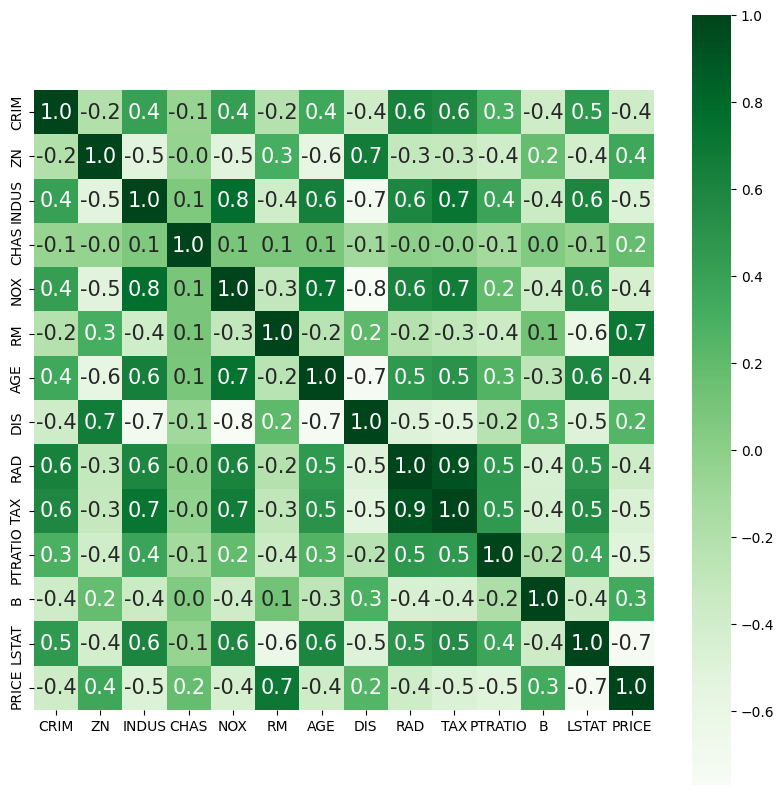

In [ ]:
# Finding out the correlation between the features
corr = data.corr()
print(corr.shape)
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
X = data[[ 'LSTAT','RM', 'TAX','PTRATIO' ,'INDUS']]
#X = data["ZN"].values.reshape((-1,1))
y = data['PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:

X_train=[list(X_train.values[i]) for i in range(len(X_train))][0:256]
X_test=[list(X_test.values[i]) for i in range(len(X_test))][0:128]

y_train=[y_train.values[i] for i in range(len(y_train))][0:256]
y_test=[y_test.values[i] for i in range(len(y_test))][0:128]

parameters=[random.uniform(0,2) for p in range(5)] #28=(7,2)+7
len(X_train),len(X_test)

(256, 128)

# BFGS optimizer

In [ ]:
out = minimize(calculate_cost_function_5parameter_power1, x0=parameters,args=(X_train,y_train), method="BFGS", options={'maxiter':200}, tol=1e-6)
optimized_parameters_BFGS=out['x']
print(optimized_parameters_BFGS)


[1.97658616 1.23957099 0.62012984 0.56200577 1.12811328]


In [ ]:
R_2_5parameter_power1(X_test,optimized_parameters_BFGS,y_test)

-1272.5700749800242

# classical methode

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X = data[[ 'LSTAT','RM', 'TAX','PTRATIO' ,'INDUS']]
#X = data["ZN"].values.reshape((-1,1))
y = data['PRICE']



In [ ]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients


,Attribute,Coefficients
0,LSTAT,-0.653831
1,RM,3.879605
2,TAX,-0.002325
3,PTRATIO,-1.052317
4,INDUS,0.105036


In [ ]:
# Model prediction on train data
y_pred = mlr.predict(X_test)

/home/narges/.local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred))

R^2: 0.701435514551302


In [ ]:
mlr.coef_

# COBYLA optimizer

In [ ]:
X = data[[ 'LSTAT','RM', 'TAX','PTRATIO' ,'INDUS']]
#X = data["ZN"].values.reshape((-1,1))
y = data['PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
X_train=[list(X_train.values[i]) for i in range(len(X_train))][0:256]
X_test=[list(X_test.values[i]) for i in range(len(X_test))][0:128]

y_train=[y_train.values[i] for i in range(len(y_train))][0:256]
y_test=[y_test.values[i] for i in range(len(y_test))][0:128]

parameters=[random.uniform(0,2) for p in range(5)] #28=(7,2)+7
len(X_train),len(X_test)

(256, 128)

In [ ]:
out1 = minimize(calculate_cost_function_5parameter_power1, x0=parameters,args=(X_train,y_train), method="COBYLA", options={'maxiter':200}, tol=1e-6)
optimized_parameters_COBYLA=out1['x']
print(optimized_parameters_COBYLA)
print(R_2_5parameter_power1(X_test,optimized_parameters_COBYLA,y_test))


[ 3.28585712  0.67096129 -0.03710989  0.05760341 -0.25520181]
-6.907076399112241


## Nelder-Mead  **optimizer**

In [ ]:
out2 = minimize(calculate_cost_function_5parameter_power1, x0=parameters,args=(X_train,y_train), method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
optimized_parameters_Nelder_Mead=out2['x']
print(optimized_parameters_Nelder_Mead)
print(R_2_5parameter_power1(X_test,optimized_parameters_Nelder_Mead,y_test))

[0.6329298  0.12047764 0.17364119 0.47275973 1.84098065]
-86.4151590477144


## "CG"

In [ ]:
out3 = minimize(calculate_cost_function_5parameter_power1, x0=parameters,args=(X_train,y_train), method="CG", options={'maxiter':200}, tol=1e-6)
optimized_parameters_CG=out3['x']
print(optimized_parameters_CG)
print(R_2_5parameter_power1(X_test,optimized_parameters_CG,y_test))

[0.64152181 0.11405784 0.1843278  0.49743535 1.75208865]
-93.55774979900391


# trust-constr

In [ ]:
out4 = minimize(calculate_cost_function_5parameter_power1, x0=parameters,args=(X_train,y_train), method="trust-constr", options={'maxiter':200}, tol=1e-6)
optimized_parameters_trust_constr=out4['x']
print(optimized_parameters_trust_constr)
print(R_2_5parameter_power1(X_test,optimized_parameters_trust_constr,y_test))

[ 0.0102416  -0.46962516  0.00644849  0.32289098  1.92906346]
-3.592315735679561


In [ ]:
optimized_parameters_BFGS=out['x']
optimized_parameters_COBYLA=out1['x']
optimized_parameters_Nelder_Mead=out2['x']
optimized_parameters_CG=out3['x']
optimized_parameters_trust_constr=out4['x']

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients


,Attribute,Coefficients
0,LSTAT,-0.550862
1,RM,4.239299
2,TAX,-0.003943
3,PTRATIO,-0.851535
4,INDUS,0.031867


In [ ]:
# Model prediction on train data
y_pred = mlr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.6995482846937293
MAE: 3.749766239799503
MSE: 31.3731898294884
RMSE: 5.601177539543663


In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()